# 元論文
https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-84.pdf

# SVMで解析していたが、XGboostでやってみた

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import svm


from sklearn.metrics import confusion_matrix

In [7]:

#kaggle(https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)から取得

df_test = pd.read_csv("/Users/ono/python/kaggle/data/human-activity-recognition-with-smartphones/test.csv")
df_train = pd.read_csv("/Users/ono/python/kaggle/data/human-activity-recognition-with-smartphones/train.csv")

In [8]:
#562の特徴量のデータと、カラム名Activity（立つ、座るなど）は目的変数

df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
df_train_c=df_train.copy()
df_test_c=df_test.copy()
del df_train_c["subject"]
del df_test_c["subject"]


In [10]:
list(set(df_train_c["Activity"]))

['WALKING',
 'SITTING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'LAYING']

In [11]:
#上記のActivityを分類するにあたり、各Activityに番号を振る

def get_act(_x):
    if _x=='WALKING':
        return 0
    if _x=='WALKING_DOWNSTAIRS':
        return 1
    if _x=='WALKING_UPSTAIRS':
        return 2
    if _x=='SITTING':
        return 3
    if _x=='STANDING':
        return 4
    if _x=='LAYING':
        return 5
    

In [12]:
#actとう言うカラム名にする
df_train_c["act"]=df_train_c["Activity"].apply(get_act)
del df_train_c["Activity"]

Y_train=df_train_c["act"]
del df_train_c["act"]
X_train=df_train_c

Y_train=np.array(Y_train)
X_train=X_train.as_matrix()

In [15]:

#学習

model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [16]:
df_test_d=df_test_c.copy()

df_test_d["act"]=df_test_d["Activity"].apply(get_act)
del df_test_d["Activity"]
Y_test=df_test_d["act"]
del df_test_d["act"]
X_test=df_test_d


Y_test=np.array(Y_test)

X_test=X_test.as_matrix()

In [21]:

predicted = model_xgb.predict(X_test)
expected = Y_test


print("正解率 : {}".format(metrics.accuracy_score(expected,predicted)))

正解率 : 0.9395995928062436


In [26]:
#クロスバリデーションによる結果
score=cross_val_score(estimator=model_xgb,
                      X=X_train,
                      y=Y_train,
                      cv=5,
                      n_jobs=-1)

print("score %.3f +/- %.3f" %(np.mean(score),np.std(score)))

score 0.927 +/- 0.023


[[488   5   3   0   0   0]
 [  8 384  28   0   0   0]
 [ 25   7 439   0   0   0]
 [  0   0   2 421  68   0]
 [  0   0   0  32 500   0]
 [  0   0   0   0   0 537]]


/Users/ono/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Hiragino Kaku Gothic Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


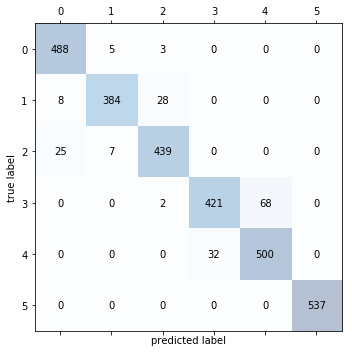

In [31]:


confmat = confusion_matrix(y_true=expected, y_pred=predicted)
print(confmat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [43]:
#ランダムサーチによるパラメーター推定

from sklearn.grid_search import GridSearchCV,RandomizedSearchCV

param_test1 = {
    'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'min_child_weight':[5,6,7,8,9,10,11,12,13],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0.09, 0.1,0.2,0.3],

}
gsearch1 = RandomizedSearchCV(model_xgb, param_test1, n_jobs=-1)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_




KeyboardInterrupt: 

In [42]:
#チューニングしたパラメーターで再度学習
"""
early_stopping_roundsとは : 

It is generally a good idea to select the early_stopping_rounds as a reasonable function 
of the total number of training epochs (10% in this case) or attempt to correspond to 
the period of inflection points as might be observed on plots of learning curves.
"""

#eval_metricについて
#2値分類の時 : logloss
#他クラス分類の時 : 

model_xgb_tune=xgb.XGBClassifier(n_estimators=500,**gsearch1.best_params_)
model_xgb_tune.fit(X_train, Y_train,
                   early_stopping_rounds=10,
                   eval_metric="mlogloss",
                   eval_set=[(X_test, Y_test)],
                   verbose=False)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=16,
       min_child_weight=13, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0.2, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6)

正解率 : 0.9507974211062097
score 0.933 +/- 0.017
[[492   3   1   0   0   0]
 [  6 386  28   0   0   0]
 [ 31   4 436   0   0   0]
 [  0   0   2 441  48   0]
 [  0   0   0  22 510   0]
 [  0   0   0   0   0 537]]


/Users/ono/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Hiragino Kaku Gothic Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


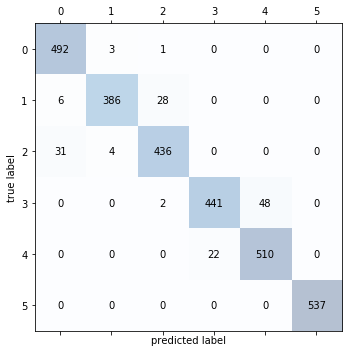

In [46]:

predicted = model_xgb_tune.predict(X_test)
expected = Y_test
print("正解率 : {}".format(metrics.accuracy_score(expected,predicted)))
#クロスバリデーションによる結果

score=cross_val_score(estimator=model_xgb_tune,
                      X=X_train,
                      y=Y_train,
                      cv=5,
                      n_jobs=-1)

print("score %.3f +/- %.3f" %(np.mean(score),np.std(score)))


confmat = confusion_matrix(y_true=expected, y_pred=predicted)
print(confmat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_true=expected, y_pred=predicted))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       496
          1       0.98      0.92      0.95       420
          2       0.93      0.93      0.93       471
          3       0.95      0.90      0.92       491
          4       0.91      0.96      0.94       532
          5       1.00      1.00      1.00       537

avg / total       0.95      0.95      0.95      2947



In [50]:

feat_labels = df_train.columns[1:]


importances = model_xgb.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))



 1) fBodyAcc-bandsEnergy()-9,16    0.035369
 2) tGravityAcc-min()-Z            0.034160
 3) tGravityAcc-min()-Y            0.033253
 4) tGravityAcc-energy()-Z         0.030834
 5) tBodyAcc-correlation()-X,Z     0.025393
 6) tBodyAcc-max()-Y               0.021765
 7) tBodyGyro-min()-Y              0.017231
 8) fBodyGyro-bandsEnergy()-17,24  0.017231
 9) tBodyGyro-max()-Y              0.016929
10) tGravityAcc-max()-Z            0.016929
11) fBodyGyro-meanFreq()-X         0.016626
12) tGravityAcc-mean()-Z           0.016022
13) tBodyAccJerk-max()-Y           0.015719
14) tBodyAcc-entropy()-Y           0.014813
15) fBodyAcc-max()-Y               0.014813
16) tBodyGyro-iqr()-Y              0.014813
17) tBodyGyroJerk-mean()-X         0.014510
18) tGravityAcc-mean()-Y           0.011790
19) fBodyAccJerk-maxInds-Y         0.011790
20) tBodyGyroJerk-iqr()-Y          0.011487
21) fBodyAccJerk-bandsEnergy()-9,16.2 0.010580
22) tBodyAccMag-arCoeff()2         0.010580
23) tBodyGyroMag-arCoeff()1  

325) fBodyAcc-skewness()-Z          0.000302
326) fBodyAccMag-meanFreq()         0.000302
327) tBodyGyro-max()-X              0.000302
328) tGravityAcc-mad()-X            0.000302
329) fBodyGyro-max()-X              0.000302
330) tGravityAcc-std()-Z            0.000302
331) tGravityAcc-std()-Y            0.000302
332) fBodyGyro-bandsEnergy()-33,48  0.000302
333) tBodyGyroJerkMag-arCoeff()3    0.000302
334) fBodyAccJerk-iqr()-Y           0.000302
335) fBodyAcc-bandsEnergy()-1,8.1   0.000302
336) fBodyAcc-kurtosis()-Z          0.000302
337) fBodyBodyGyroJerkMag-sma()     0.000000
338) fBodyGyro-skewness()-Y         0.000000
339) fBodyGyro-maxInds-X            0.000000
340) tBodyAccJerk-arCoeff()-Y,4     0.000000
341) fBodyGyro-bandsEnergy()-57,64.1 0.000000
342) tBodyAcc-energy()-X            0.000000
343) fBodyBodyGyroJerkMag-maxInds   0.000000
344) angle(tBodyGyroMean,gravityMean) 0.000000
345) angle(tBodyAccJerkMean),gravityMean) 0.000000
346) fBodyGyro-bandsEnergy()-1,24   0.000000
3

In [51]:
plt.figure(figsize=(100,100))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           indices, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('/Users/ono/Desktop/random_forest.png', dpi=300)
plt.show()

/Users/ono/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Hiragino Kaku Gothic Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


KeyboardInterrupt: 

In [65]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

def get_learning_curve(X_train,Y_train,X_test,Y_test,model_xgb_tune,multi_class=True):

    eval_set = [(X_train, Y_train), (X_test, Y_test)]
    if multi_class:
        model_xgb_tune.fit(X_train, Y_train, eval_metric=["error", "mlogloss"], eval_set=eval_set, verbose=False)
    else:
        model_xgb_tune.fit(X_train, Y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)


    # make predictions for test data
    y_pred = model_xgb_tune.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model_xgb_tune.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()
    # plot classification error
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()

In [68]:
 model_xgb_tune.evals_result()

{'validation_0': {'mlogloss': [1.585829,
   1.4191,
   1.286795,
   1.173394,
   1.074942,
   0.991627,
   0.918281,
   0.85216,
   0.794829,
   0.741534,
   0.694873,
   0.654758,
   0.617891,
   0.5832,
   0.551827,
   0.524242,
   0.497317,
   0.473158,
   0.451387,
   0.431554,
   0.414312,
   0.397843,
   0.382601,
   0.367706,
   0.355591,
   0.343321,
   0.333605,
   0.323848,
   0.314313,
   0.305454,
   0.297589,
   0.290527,
   0.282776,
   0.275406,
   0.269374,
   0.263765,
   0.257969,
   0.253533,
   0.248768,
   0.244294,
   0.240043,
   0.235744,
   0.230857,
   0.22684,
   0.222387,
   0.219321,
   0.21658,
   0.213961,
   0.209737,
   0.207045,
   0.204884,
   0.202238,
   0.199527,
   0.196383,
   0.194853,
   0.19314,
   0.191277,
   0.18938,
   0.187323,
   0.185544,
   0.183717,
   0.181792,
   0.180559,
   0.179456,
   0.177347,
   0.175704,
   0.174642,
   0.173576,
   0.172672,
   0.17147,
   0.169841,
   0.169246,
   0.169127,
   0.168286,
   0.16708,
   0.167